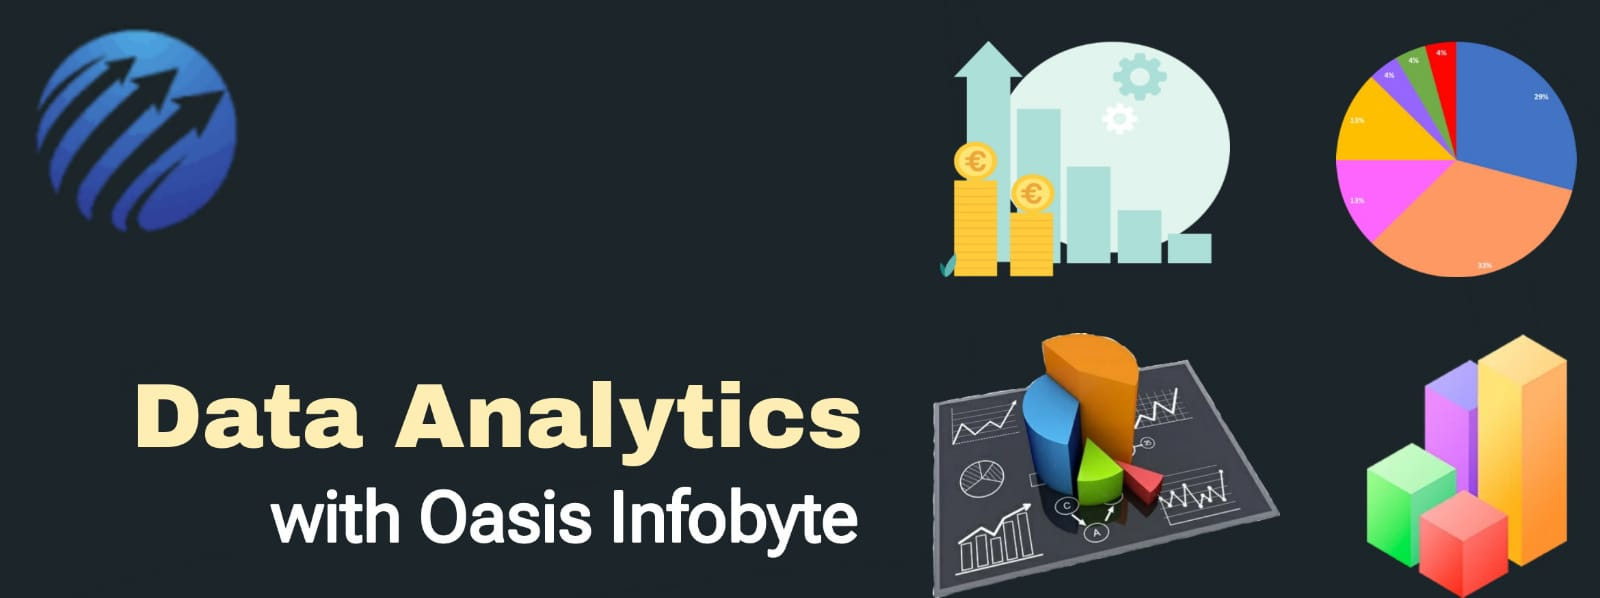

 ## Oasis Internship, January- 2024
 
 ### Bottu Bhavan, Data Analytics Intern

# Project Title: Sentiment Analysis

#### Dataset link : https://www.kaggle.com/code/mmmarchetti/play-store-sentiment-analysis-of-user-reviews/input

# Introduction:
Sentiment Analysis, also known as opinion mining, is a fascinating field within Natural Language Processing (NLP) that aims to discern the emotional tone of text data. The primary objective is to develop a model capable of accurately classifying sentiments as positive, negative, or neutral. This technology holds significant value in extracting insights from various sources like customer feedback, social media trends, and public opinion, providing businesses and researchers with valuable information.

# Key Concepts and Challenges:


## Sentiment Analysis:

Definition: Sentiment Analysis involves evaluating and interpreting textual content to determine its emotional orientation.

Purpose: Understanding public sentiment, customer feedback, and trends to make informed decisions.


## Natural Language Processing (NLP):

Definition: NLP is a branch of artificial intelligence that focuses on the interaction between computers and human language.

Purpose: Utilizing algorithms and models to process, understand, and interpret human language in the context of sentiment analysis.


## Machine Learning Algorithms:

Models: Implementing a variety of algorithms for sentiment classification, including Support Vector Machines, Naive Bayes, and deep learning architectures like recurrent neural networks (RNNs) or transformers.

Purpose: Leveraging machine learning to train models that can accurately predict the sentiment of text.


## Feature Engineering:

Definition: The process of selecting and transforming relevant features from raw text data to improve model performance.

Purpose: Identifying and extracting key elements that contribute to sentiment classification, enhancing the model's ability to discern nuances.


## Data Visualization:

Definition: The presentation of sentiment analysis results through graphical representations and visualizations.

Purpose: Facilitating clear interpretation of sentiment trends, enabling stakeholders to grasp insights quickly and make informed decisions.

In [1]:
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import numpy as np
import pandas as pd 
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import re  
from collections import defaultdict 
import spacy  
from time import time
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
import seaborn as sns
sns.set_style("darkgrid")

import itertools
from wordcloud import WordCloud
from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec, KeyedVectors
from tensorflow.keras.layers import Embedding

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')

%matplotlib inline

C:\Users\admin\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dataframe = pd.read_csv('Task4.csv')
dataframe.head(2)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0


In [4]:
dataframe.isnull()

,clean_text,category
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
162975,False,False
162976,False,False
162977,False,False
162978,False,False


In [5]:
dataframe.isnull().sum()

clean_text    4
category      7
dtype: int64

In [6]:
dataframe = dataframe.dropna().reset_index(drop=True)
dataframe.isnull().sum()

clean_text    0
category      0
dtype: int64

In [7]:
dataframe['clean_text']= dataframe['clean_text'].str.lower()

In [8]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataframe['clean_text'] = dataframe['clean_text'].apply(lambda x: cleaning_URLs(x))

In [9]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataframe['clean_text'] = dataframe['clean_text'].apply(lambda x: cleaning_numbers(x))

In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

dataframe['clean_text'] = np.vectorize(remove_pattern)(dataframe['clean_text'], "@[\w]*")

In [11]:
dataframe['clean_text'] = dataframe['clean_text'].str.replace("[^a-zA-Z#]", " ")
dataframe.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_18324\2365294761.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['clean_text'] = dataframe['clean_text'].str.replace("[^a-zA-Z#]", " ")


,clean_text,category
0,when modi promised minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [12]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [13]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in dataframe['clean_text'])


In [14]:
t = time()
txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))
dataframe.head(5)

Time to clean up everything: 12.7 mins


,clean_text,category
0,when modi promised minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [15]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
print(df_clean.shape)
df_clean.head(5)

(154006, 1)


,clean
0,modi promise minimum government maximum govern...
1,talk nonsense continue drama vote modi
2,vote modi welcome bjp tell rahul main campaign...
3,ask supporter prefix chowkidar name modi great...
4,answer powerful world leader today trump putin...


91352


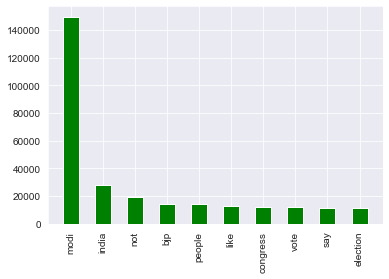

In [16]:
all_words = " ".join([sentence for sentence in df_clean['clean']])
all_words = all_words.split()

freq_dict = {}
for word in all_words:
    # set the default value to 0
    freq_dict.setdefault(word, 0)
    # increment the value by 1
    freq_dict[word] += 1

voc_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse = True))
print(len(voc_freq_dict))
hist_plot = dict(itertools.islice(voc_freq_dict.items(), 10))
plt.bar(hist_plot.keys(), hist_plot.values(), width=0.5, color='g')
plt.xticks(rotation=90)
plt.show()

In [17]:
# Removing stop words using nltk lib

#Tokenization of text
tokenizer=ToktokTokenizer() 

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing standard english stopwords like prepositions, adverbs
stop = set(stopwords.words('english'))
print("NLTK stop word lists \n")
print(stop)

NLTK stop word lists 

{'this', 'by', 'in', "needn't", 'over', 'such', 'above', 'off', 'down', 'up', 'y', "couldn't", 'haven', 'him', 'once', 'their', 'each', 'yourselves', "mustn't", "wasn't", 'here', 'who', 'it', 'them', 'as', 'with', 'herself', "shan't", 've', "should've", "hadn't", 'more', "weren't", 'after', 'ourselves', 'nor', "you'd", 'just', 'hadn', 'some', 'why', 'having', 'needn', 'shan', 'weren', 'has', 'then', 'an', 'what', 'wouldn', "haven't", 'for', 'on', 'not', 'didn', 'below', 'same', 'doesn', 'yourself', 'they', "you'll", 't', 'we', 'o', 'into', 'at', 'your', 'should', 's', 'myself', 'were', 'under', 'again', 'isn', 'she', 'itself', 'these', 'while', 'until', 'being', 'do', 'he', 'when', 'both', 'out', 'mightn', 'its', 'will', 'own', 'no', 'hers', 'themselves', 'me', "you're", 'of', 'the', "didn't", "won't", 'don', 'now', 'than', 'but', 'any', 'is', 'most', 'whom', 'ma', 'other', 'have', 'during', "that'll", "doesn't", 'about', 'his', 'couldn', 'm', 'had', 'can', 'won'

In [18]:
#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [19]:
df_clean['clean'] = df_clean['clean'].apply(remove_stopwords)
df_clean.head()

,clean
0,modi promise minimum government maximum govern...
1,talk nonsense continue drama vote modi
2,vote modi welcome bjp tell rahul main campaign...
3,ask supporter prefix chowkidar name modi great...
4,answer powerful world leader today trump putin...


In [20]:
# How many unique words in the vocabulary?

all_words = " ".join([sentence for sentence in df_clean['clean']])
all_words = all_words.split()

freq_dict = {}
for word in all_words:
    # set the default value to 0
    freq_dict.setdefault(word, 0)
    # increment the value by 1
    freq_dict[word] += 1

voc_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse = True))
print(len(voc_freq_dict))

91284


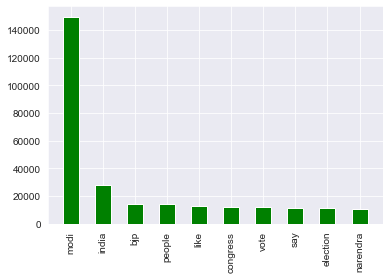

In [21]:
hist_plot = dict(itertools.islice(voc_freq_dict.items(), 10))
plt.bar(hist_plot.keys(), hist_plot.values(), width=0.5, color='g')
plt.xticks(rotation=90)
plt.show()


In [24]:
sent = [row.split() for row in df_clean['clean']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]

In [25]:
all_sentances = ' '
j = 0
for i in sentences:
    check = ' '.join(i)  
    all_sentances = ' '.join([all_sentances, check])


In [33]:
cores = multiprocessing.cpu_count() 
print(cores)

4


In [34]:
model = Word2Vec(
    sentences = sentences,
    compute_loss=True
)
model.get_latest_training_loss()

6095803.5

In [35]:
# Here it builds the vocabulary from a sequence of sentences and thus later can be used in the model.

model.build_vocab(sentences, progress_per=10000)
model.corpus_count

154006

In [36]:
class MetricCallback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self, every=10):
        self.myloss = []
        self.epoch = 0
        self.every = every

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.myloss.append(loss)
        else:
            self.myloss.append(loss - self.loss_previous_step)
        if self.epoch % self.every == 0:
            print(f'Loss after epoch {self.epoch}: {self.myloss[-1]}') 
        self.epoch += 1
        self.loss_previous_step = loss

Loss after epoch 0: 1467727.5
Loss after epoch 1: 1261389.0
Loss after epoch 2: 1095061.75
Loss after epoch 3: 1048208.25
Loss after epoch 4: 958771.0


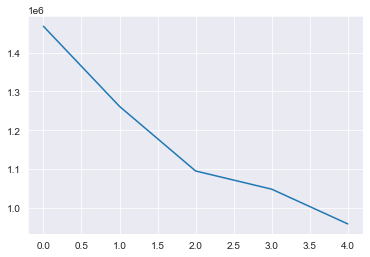

In [37]:
metric = MetricCallback(every=1)
model = Word2Vec(
    sentences = sentences,
    vector_size=300,
    max_vocab_size = model.corpus_count,
    compute_loss=True,
    callbacks=[metric],
    alpha=0.03,
    min_alpha=0.0007, 
    workers=cores-1
)
plt.plot(metric.myloss)

Loss after epoch 0: 1519479.125
Loss after epoch 1: 1259863.875
Loss after epoch 2: 1177478.25
Loss after epoch 3: 1046026.75
Loss after epoch 4: 908719.0
Loss after epoch 5: 914405.0
Loss after epoch 6: 870775.0
Loss after epoch 7: 891592.0
Loss after epoch 8: 728837.0
Loss after epoch 9: 750984.0


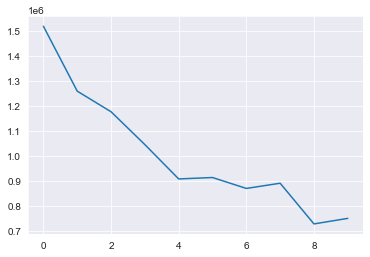

In [38]:
metric = MetricCallback(every=1)
model = Word2Vec(
    sentences = sentences,
    vector_size=300,
    max_vocab_size = model.corpus_count,
    compute_loss=True,
    callbacks=[metric],
    alpha=0.03,
    min_alpha=0.0007, 
    workers=cores-1,
    epochs = 10,
)
plt.plot(metric.myloss)

In [39]:
model.wv.most_similar(positive=['india'])

[('country', 0.5745746493339539),
 ('prosperous', 0.456497460603714),
 ('indias', 0.4502427577972412),
 ('nation', 0.42700183391571045),
 ('instability', 0.41289201378822327),
 ('super_power', 0.4094240069389343),
 ('modern', 0.39851465821266174),
 ('attain', 0.39404457807540894),
 ('path', 0.3928854763507843),
 ('county', 0.3888312876224518)]

In [40]:
model.wv.most_similar(negative=['india'])

[('patra', 0.38631460070610046),
 ('kumar', 0.3760021924972534),
 ('harry', 0.35654643177986145),
 ('verma', 0.35037872195243835),
 ('jave', 0.3483871817588806),
 ('navika', 0.3483453094959259),
 ('amish', 0.3458215892314911),
 ('rai', 0.3451520502567291),
 ('tick', 0.3447742164134979),
 ('waise', 0.3423006236553192)]

In [41]:
model.wv.most_similar(positive=['bjp'])

[('bjps', 0.5339240431785583),
 ('trs', 0.5206396579742432),
 ('dmk', 0.5133427977561951),
 ('bjd', 0.5034548044204712),
 ('cadre', 0.5006088018417358),
 ('jds', 0.49941539764404297),
 ('regional_party', 0.49540090560913086),
 ('ncp', 0.49474596977233887),
 ('party', 0.48508718609809875),
 ('karnataka', 0.47993358969688416)]

In [42]:
model.wv.most_similar(negative=['bjp'])

[('blockchain', 0.37640103697776794),
 ('classic', 0.3675963580608368),
 ('shooting', 0.3428265154361725),
 ('dhoom', 0.33959197998046875),
 ('mild', 0.33760079741477966),
 ('mahabharat', 0.32445093989372253),
 ('candy', 0.3213241994380951),
 ('tcs', 0.3175652325153351),
 ('launcher', 0.31526821851730347),
 ('dish', 0.30463331937789917)]

In [43]:
model.wv.most_similar(positive=['narendramodi'])

[('financialxpress', 0.7553853392601013),
 ('koraput', 0.7355484366416931),
 ('watch_live', 0.7296406030654907),
 ('aalo', 0.7263669371604919),
 ('late_update', 0.7163812518119812),
 ('pmoindia', 0.7042932510375977),
 ('videoconference', 0.6937587261199951),
 ('talkatora_stadium', 0.6903520822525024),
 ('ndtv_news', 0.6879289150238037),
 ('live_update', 0.6867480874061584)]

In [44]:
model.wv.most_similar(negative=['election'])

[('charter', 0.29997363686561584),
 ('candy', 0.2995643615722656),
 ('amartya', 0.27960920333862305),
 ('kumkum', 0.27858322858810425),
 ('gobar', 0.27351805567741394),
 ('mild', 0.27236947417259216),
 ('repute', 0.2691965401172638),
 ('rakshak', 0.26602399349212646),
 ('gabbar', 0.2653878927230835),
 ('accountant', 0.2643273174762726)]

In [45]:
model.wv.most_similar(positive=['election'])

[('poll', 0.6554831862449646),
 ('general_election', 0.5430676937103271),
 ('polls', 0.5049003958702087),
 ('electoral', 0.44979187846183777),
 ('unlikely', 0.4366816282272339),
 ('loksabha_election', 0.43631672859191895),
 ('election_campaign', 0.43087103962898254),
 ('elections', 0.428619921207428),
 ('assembly_election', 0.42329198122024536),
 ('bypoll', 0.4204215407371521)]